In [56]:
!pip install -qU ucimlrepo

In [57]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

1. Leer los datos desde una página web.

In [58]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


In [59]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2. Renombrar las columnas en formato PascalCase.

Se crea una función la cual convierte un string en formato PascalCase:

In [60]:
def PascalCase(string):
  splitted = string.split('_')
  capitalized = [word.capitalize() for word in splitted]
  return ''.join(capitalized)

Se transforma cada uno de los nombres de la columna a formato PascalCase:

In [61]:
X.columns = [PascalCase(column) for column in X.columns]

In [62]:
X.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el DataFrame.

Método `head()`:

In [63]:
X.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Método `tail()`:

In [64]:
X.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Método `describe()`:

In [65]:
X.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Método `info()`:

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

Se pueede usar el método `isnull()` y luego el método `sum()` para verificar si hay valores `null`:

In [67]:
X.isnull().sum()

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0
FractalDimension1,0


Lo mismo se puede hacer para los valores `NaN`:

In [68]:
X.isna().sum()

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0
FractalDimension1,0


Se puede observar que no hay ni valores `null` o `NaN` en los datos.

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método `unique()` para mostrar estos valores.

In [69]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [70]:
pd.unique(y['Diagnosis'])

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método `countplot()`.

[]

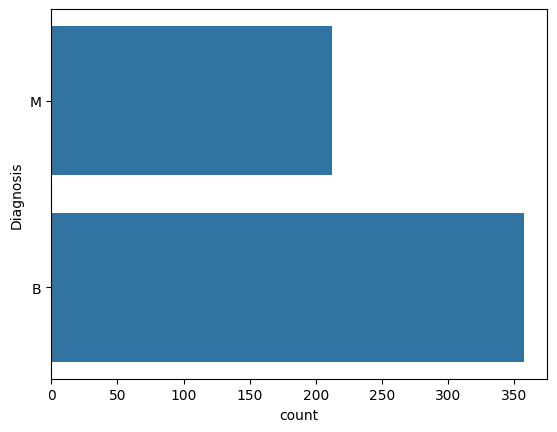

In [71]:
sns.countplot(y['Diagnosis'])
plt.plot()

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [72]:
X.loc[:, 'DiagnosisNumeric'] = y.loc[:, 'Diagnosis'].apply(lambda x: 0 if x == 'B' else 1)

/tmp/ipython-input-3746658571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'DiagnosisNumeric'] = y.loc[:, 'Diagnosis'].apply(lambda x: 0 if x == 'B' else 1)


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula: `(x - mean(x)) / std(x)`

Se normaliza cada columna, menos la columna `DiagnosisNumeric`:

In [73]:
X_normalized = (X.iloc[:, :-1] - X.iloc[:, :-1].mean()) / X.iloc[:, :-1].std()

Se agrega la columna de `DiagnnosisNumeric`:

In [74]:
X_normalized.loc[:, 'DiagnosisNumeric'] = X['DiagnosisNumeric']

9. Agrupar características similares y calcular su promedio. Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean']
```

Para esto se crea una rutina que encuentra las columnas que empiecen con cierto patrón de carácteres, luego cada nombre de dichas columnas se guardan en un array, esto para luego hacer un slice en el `DataFrame` con esas columnas y calcular el promedio para cada fila en ese slice para entocnes crear una nueva columna en el `DataFrame` con dichos promedios:

In [75]:
def similar_cols_mean(df, string):
  cols = []
  for col in df.columns:
    if col.startswith(string):
      cols.append(col)

  df.loc[:, string + 'Mean'] = df.loc[:, cols].mean(axis=1)

Se crean las columnas pedidas de promedios y se calculan los datos de dichas columnas:

In [76]:
characteristics = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
                   'Compactness', 'Concavity', 'ConcavePoints', 'Symmetry',
                   'FractalDimension']

for characteristic in characteristics:
  similar_cols_mean(X_normalized, characteristic)

Carácterísticas pedidas:

In [77]:
mean_characteristics = ['RadiusMean', 'TextureMean', 'PerimeterMean',
                        'AreaMean', 'SmoothnessMean', 'CompactnessMean',
                        'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean',
                        'FractalDimensionMean']
X_normalized.loc[:, mean_characteristics].head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

In [78]:
Bs = X_normalized[X_normalized['DiagnosisNumeric'] == 0]['RadiusMean']
Ms = X_normalized[X_normalized['DiagnosisNumeric'] == 1]['RadiusMean']

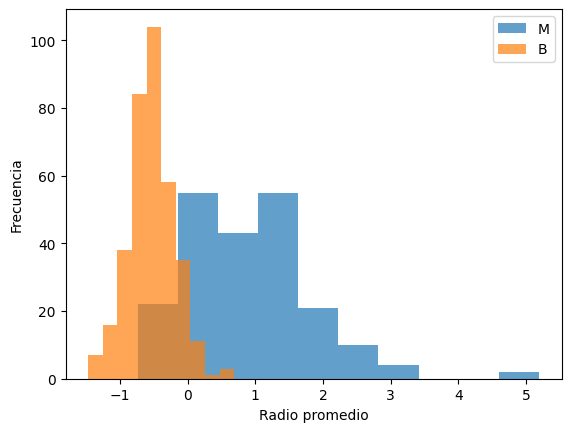

In [79]:
plt.hist(Ms, label='M', alpha=0.7)
plt.hist(Bs, label='B', alpha=0.7)
plt.ylabel("Frecuencia")
plt.xlabel("Radio promedio")
plt.legend()
plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

In [80]:
columns = ['RadiusMean', 'TextureMean', 'PerimeterMean',
           'AreaMean', 'SmoothnessMean', 'CompactnessMean',
           'ConcavityMean', 'ConcavePointsMean', 'Symmetry3',
           'FractalDimension3', 'DiagnosisNumeric']

In [81]:
data = pd.melt(X_normalized[columns],
               id_vars="DiagnosisNumeric",
               var_name="features",
               value_name="value")

[]

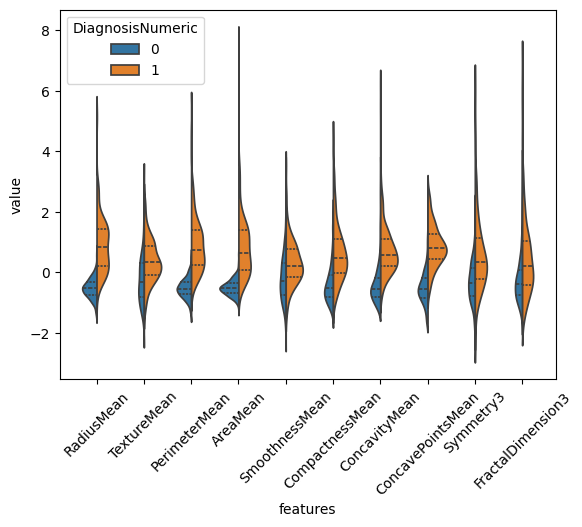

In [82]:
sns.violinplot(x="features", y="value", hue="DiagnosisNumeric", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
plt.plot()

12. Determinar y eliminar los valores atípicos (`outliers`) en la columna RadiusMean.
Para identificarlos, construye un gráfico tipo `boxplot`:

Se obsevan los `outliers` usando una `boxplot`:

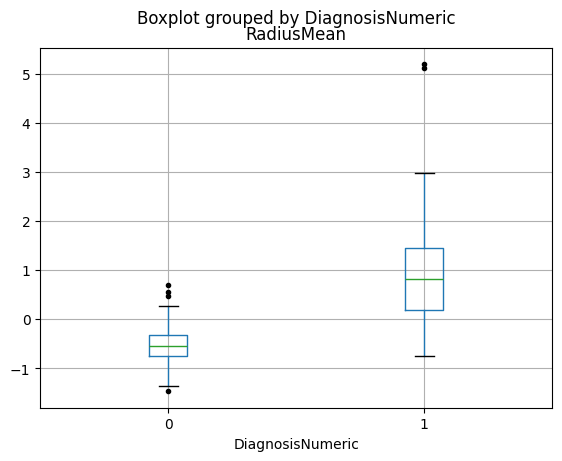

In [83]:
X_normalized.boxplot(column="RadiusMean",
                     by='DiagnosisNumeric',
                     sym='k.')
plt.show()

Aplicamos la limpieza de `outliers` para `DiagnosisNumeric: 0`:

In [84]:
Q1_0 = X_normalized[X_normalized['DiagnosisNumeric'] == 0]['RadiusMean'].quantile(0.25)
Q3_0 = X_normalized[X_normalized['DiagnosisNumeric'] == 0]['RadiusMean'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

RadiusMeanClean_0 = X_normalized[(X_normalized['DiagnosisNumeric'] == 0) & (X_normalized['RadiusMean'] >= Q1_0 - 1.5 * IQR_0) & (X_normalized['RadiusMean'] <= Q3_0 + 1.5 * IQR_0)]

Aplicamos la limpieza de `outliers` para `DiagnosisNumeric: 1`:

In [85]:
Q1_1 = X_normalized[X_normalized['DiagnosisNumeric'] == 1]['RadiusMean'].quantile(0.25)
Q3_1 = X_normalized[X_normalized['DiagnosisNumeric'] == 1]['RadiusMean'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

RadiusMeanClean_1 = X_normalized[(X_normalized['DiagnosisNumeric'] == 1) & (X_normalized['RadiusMean'] >= Q1_1 - 1.5 * IQR_1) & (X_normalized['RadiusMean'] <= Q3_1 + 1.5 * IQR_1)]

Se grafica de nuevo el `boxplot` sin `outliers`:

In [86]:
RadiusMeanClean = pd.concat([RadiusMeanClean_0[['RadiusMean', 'DiagnosisNumeric']],
                            RadiusMeanClean_1[['RadiusMean', 'DiagnosisNumeric']]])

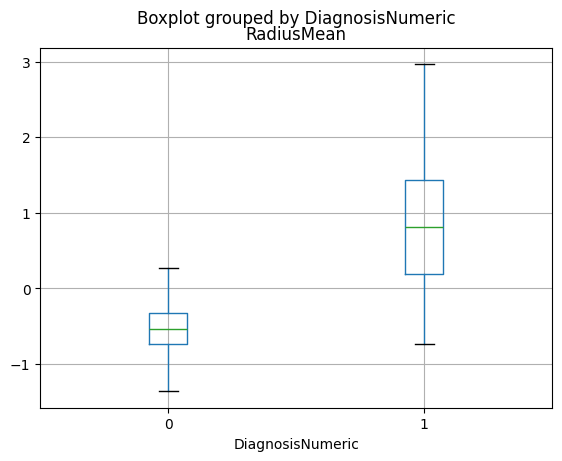

In [87]:
RadiusMeanClean.boxplot(column="RadiusMean",
                        by='DiagnosisNumeric',
                        sym='k.')
plt.show()

13. Encontrar la matrix de correlación, emplear el metodo `corr()`, dentro de `seaborn` buscar el metodo `heatmap()` para realizar un grafico de la matrix de correlación.

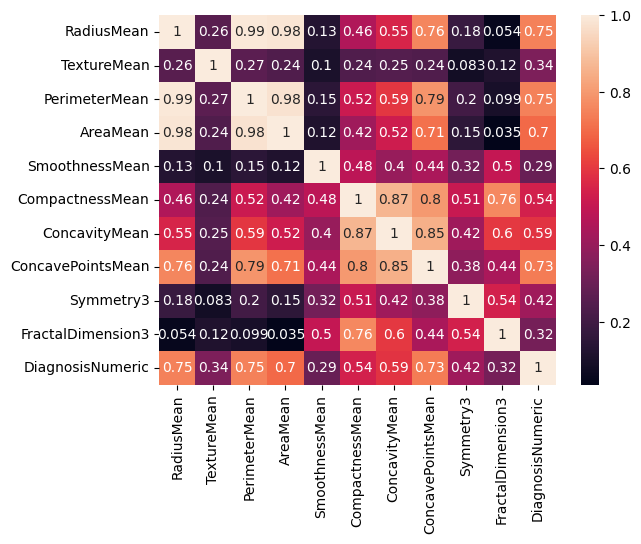

In [88]:
data = X_normalized[columns].corr()
sns.heatmap(data, annot=True)
plt.show()

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Se pueden realizar los siguientes gráficos:


* **Gráficos de dispersión (Scatter plots)**: Permiten visualizar la relación entre dos variables numéricas.
* **Gráficos de pares (Pair plots)**: Muestran gráficos de dispersión para cada par de variables en el DataFrame, lo que ayuda a identificar correlaciones y patrones.
* **Gráficos de densidad (Density plots)**: Muestran la distribución de una variable numérica.
* **Gráficos de barras (Bar plots)**: Útiles para comparar la frecuencia de diferentes categorías.